In [247]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [251]:
# -------------------------------
# 1. Get Time-Series Data for QQQ
# -------------------------------
ticker = 'QQQ'
data = yf.download(ticker, start="2020-03-27", end="2025-03-28")
#print(data)
# Using the 'Close' column since adjusted prices are in 'Close' by default.
price = data['Close']

# -------------------------------
# 2. Calculate Daily Returns and Volatility
# -------------------------------
# Calculate daily returns as percentage change
returns = price.pct_change().dropna()

# Calculate a 30-day rolling volatility.
# Multiplying by sqrt(252) annualizes the volatility (assuming 252 trading days per year).
rolling_window = 30
volatility = returns.rolling(window=rolling_window).std() * np.sqrt(252)



[*********************100%***********************]  1 of 1 completed



1 Failed download:
['QQQ']: OperationalError('unable to open database file')


In [252]:
print(returns)


Empty DataFrame
Columns: [QQQ]
Index: []


In [240]:
# TODO: Bollinger Band: Compute 20 day (1 month trading) SMA of the stock price S_t, the band is S_avg,t +- 2 * sigma
sma_20 = price.rolling(window=40).mean()
ema_20 = price.ewm(span=40, adjust=False).mean()


# Compute 20-day rolling standard deviation
std_20 = price.rolling(window=40).std()

# Calculate upper and lower Bollinger Bands
upper_band = sma_20 + 2 * std_20
lower_band = sma_20 - 2 * std_20

print("Bollinger Low: ", lower_band)
print("Bollinger High: ", upper_band)


Bollinger Low:  Ticker             QQQ
Date                  
2020-03-27         NaN
2020-03-30         NaN
2020-03-31         NaN
2020-04-01         NaN
2020-04-02         NaN
...                ...
2025-03-21  462.872338
2025-03-24  462.103358
2025-03-25  461.447749
2025-03-26  460.243581
2025-03-27  458.902754

[1257 rows x 1 columns]
Bollinger High:  Ticker             QQQ
Date                  
2020-03-27         NaN
2020-03-30         NaN
2020-03-31         NaN
2020-04-01         NaN
2020-04-02         NaN
...                ...
2025-03-21  553.307271
2025-03-24  552.167182
2025-03-25  551.823574
2025-03-26  551.195091
2025-03-27  550.614192

[1257 rows x 1 columns]


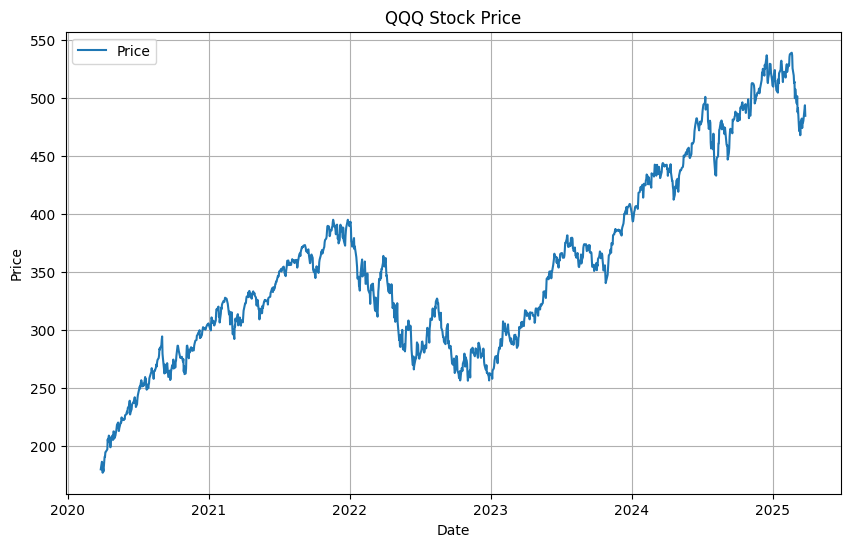

In [216]:
# -------------------------------
# 3. Plot Stock Price, Returns, and Volatility
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(price.index, price, label='Price')
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

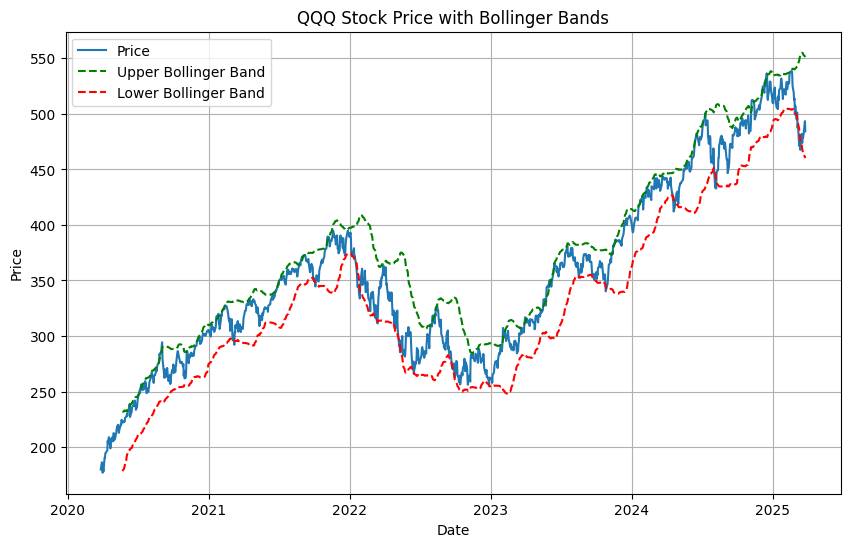

In [217]:
# TODO: Plot Bollinger band over stock price
plt.figure(figsize=(10, 6))
plt.plot(price.index, price, label='Price')
#plt.plot(sma_20.index, sma_20, label='20-day SMA', color='orange')
plt.plot(upper_band.index, upper_band, label='Upper Bollinger Band', linestyle='--', color='green')
plt.plot(lower_band.index, lower_band, label='Lower Bollinger Band', linestyle='--', color='red')
plt.title(f'{ticker} Stock Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Prices:  [179.82394409179688, 186.36476135253906, 184.77325439453125, 176.92233276367188, 180.51300048828125, 177.9509735107422, 190.67356872558594, 190.59591674804688, 194.6427001953125, 194.9241485595703, 197.03001403808594, 205.5990447998047, 203.24085998535156, 206.947998046875, 208.92767333984375, 206.4530487060547, 198.8350372314453, 204.73532104492188, 204.29867553710938, 207.52052307128906, 209.18968200683594, 205.2496795654297, 212.528076171875, 212.44070434570312, 206.4530487060547, 208.85975646972656, 211.22763061523438, 212.528076171875, 215.2647247314453, 218.2148895263672, 220.1654815673828, 215.5558319091797, 212.85801696777344, 215.27442932128906, 216.67189025878906, 220.7089385986328, 220.15576171875, 224.55189514160156, 222.1063690185547, 222.87303161621094, 222.2713165283203, 223.484375, 223.19329833984375, 226.46365356445312, 227.14295959472656, 228.6665802001953, 229.6952667236328, 228.08433532714844, 232.60659790039062, 234.41162109375, 236.10992431640625, 238.943

/var/folders/1p/rx6gwn090ql46kwfqwwf4_6c0000gn/T/ipykernel_56513/3404865311.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("We paid this much initially for 100 shares: ", 100*price[0])


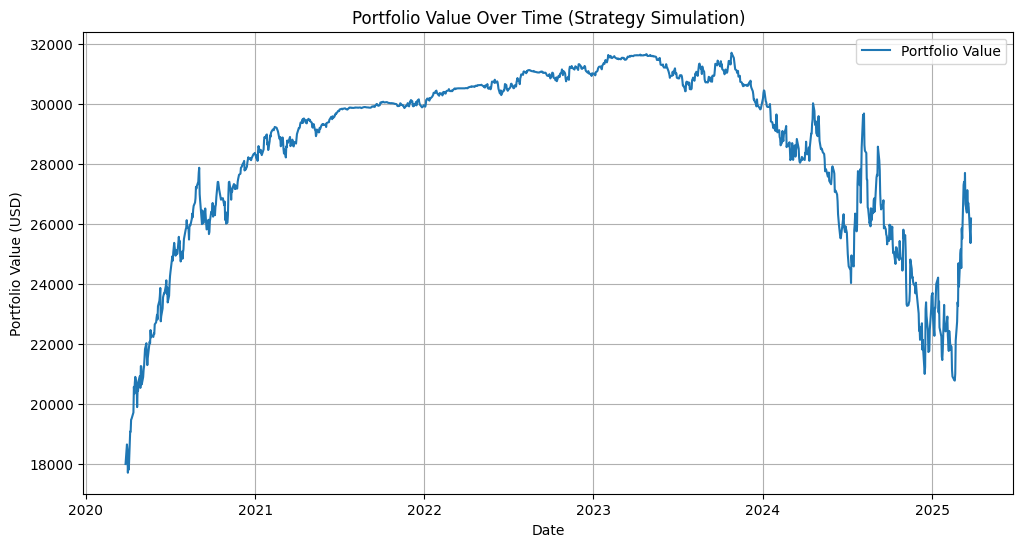

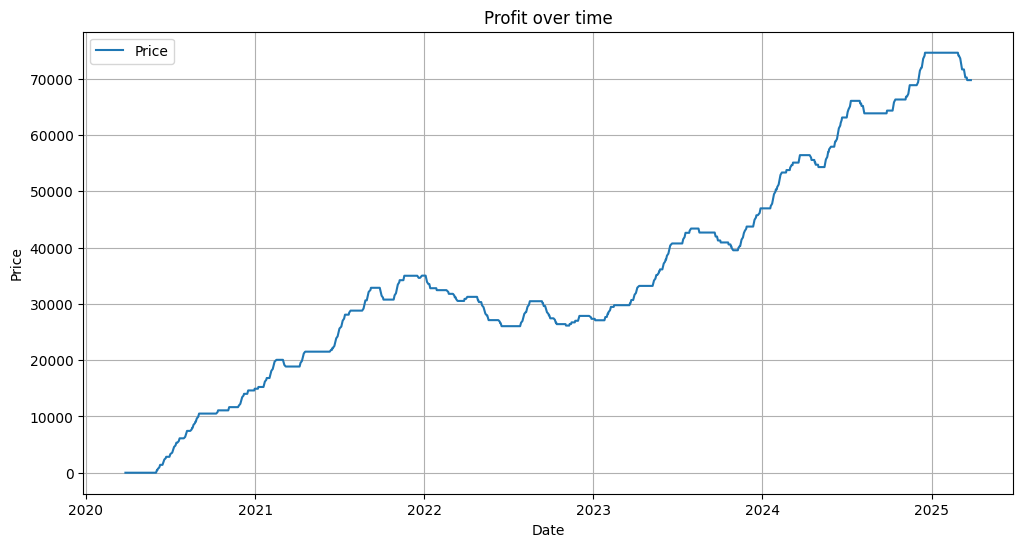

In [218]:
# My idea is: 
# - Each day, we calculate the Bollinger band as S_{avg,t} +- 2*sigma, where S_{avg,t} is the SMA of the last 20 trading days and sigma is also calculated using the last 20 days. If S_t, the actual stock price is within .5 sigma of the upper band, we will sell QQQ, if it is within .5 sigma of the lower band, we will buy up the stock. Please code up this strategy. 

# - Let's say we bought 100 shares on the initial date and we followed our strategy. Plot portfolio value over time.

# -------------------------------
# 3. Simulate the Trading Strategy
# -------------------------------
# Create a DataFrame to hold all our data
# In case any of these objects are 2D, squeeze them to 1D.
price = price.squeeze()
sma_20 = sma_20.squeeze()
std_20 = std_20.squeeze()
upper_band = upper_band.squeeze()
lower_band = lower_band.squeeze()
print("Prices: ", price.tolist())
df = pd.DataFrame({
    'Price': price,
    'SMA20': sma_20,
    'Std20': std_20,
    'UpperBand': upper_band,
    'LowerBand': lower_band
}, index=price.index.tolist())

# Initialize position and portfolio value
# We start with 100 shares on the first day where Bollinger Bands are available.
# Want to have a maximum of 100 shares
position = 100  # number of shares
portfolio_values = []  # track portfolio value over time
positions = []         # track position for debugging if needed
profit = 0
profits = []

# Iterate over the DataFrame row by row
# We use .iterrows() starting from the first valid index (where SMA20 is not NaN)
for date, row in df.iterrows():
    price_today = row['Price']
    std_today = row['Std20']
    upper_today = row['UpperBand']
    lower_today = row['LowerBand']
    
    # Only trade if we have valid Bollinger band data
    if not np.isnan(std_today):
        # Sell signal: price is within 0.5 sigma of the upper band and we currently have more than 1 share (long).
        if position > -100 and np.abs(upper_today - price_today) <= .5 * std_today:
            position -= 1
            profit += price_today 
            
        # Buy signal: price is within 0.5 sigma of the lower band and currently have less than 100 shares.
        elif position < 100 and np.abs(price_today - lower_today) <= .5 * std_today:
            position += 1
            profit -= price_today 
    
    # Calculate portfolio value as position * price
    portfolio_values.append(position * price_today + profit)
    positions.append(position)
    profits.append(profit)

# Add the portfolio values to our DataFrame for reference
df = df.assign(PortfolioValue=portfolio_values, Position=positions)
print("We paid this much initially for 100 shares: ", 100*price[0])
print("Profit: ", profit)
print(positions[-1])
# -------------------------------
# 4. Plot Portfolio Value Over Time
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PortfolioValue'], label='Portfolio Value')
plt.title('Portfolio Value Over Time (Strategy Simulation)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.grid(True)


# plt.plot(price.index, price, label='Price')
# #plt.plot(sma_20.index, sma_20, label='20-day SMA', color='orange')
# plt.plot(upper_band.index, upper_band, label='Upper Bollinger Band', linestyle='--', color='green')
# plt.plot(lower_band.index, lower_band, label='Lower Bollinger Band', linestyle='--', color='red')
# plt.title('Portfolio Value')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.grid(True)
# plt.show()

plt.figure(figsize=(12, 6))

plt.plot(price.index, profits, label='Price')
#plt.plot(sma_20.index, sma_20, label='20-day SMA', color='orange')
plt.title('Profit over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

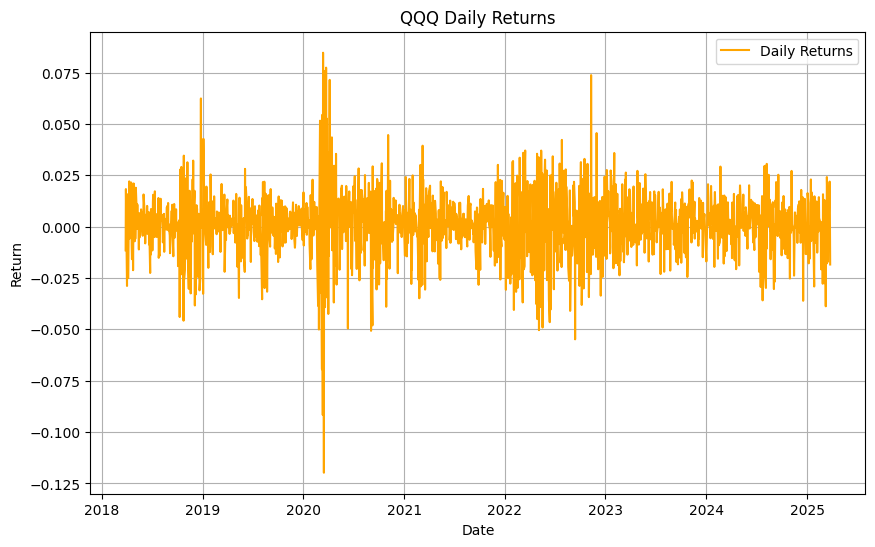

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns, label='Daily Returns', color='orange')
plt.title('QQQ Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

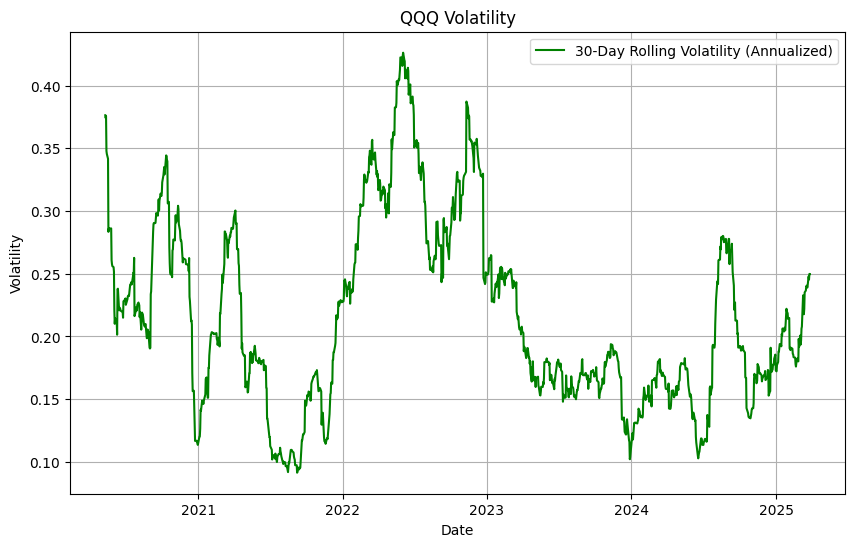

In [241]:
plt.figure(figsize=(10, 6))
plt.plot(volatility.index, volatility, label='30-Day Rolling Volatility (Annualized)', color='green')
plt.title('QQQ Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()
